In [1]:
#import numpy and matplotlib and jupyter
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt

In [2]:





###          Below is the Question 1 of Exercise 1





In [3]:
#import csv files
csv = np.genfromtxt("microchips.csv",delimiter=",")

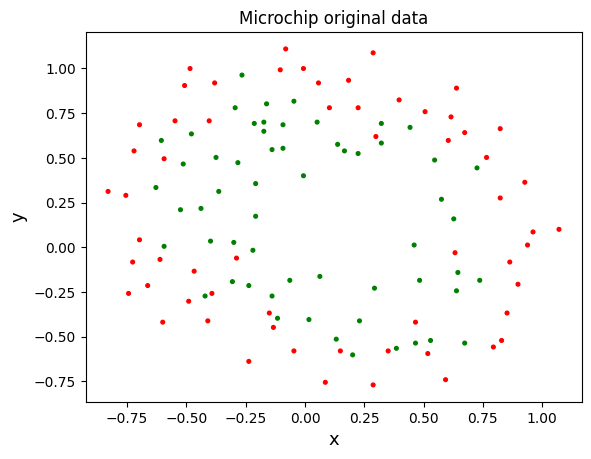

Green → OK
Red → Fail


In [4]:
# x values
x = csv[:,0]
# y values
y = csv[:,1]
# ok or not
ok_no = csv[:,2]
# plot color set
def color_plot(list):
    cols = []
    for l in list:
        if l == 1:
            cols.append("green")
        elif l ==0:
            cols.append("red")
    return cols
colors=color_plot(ok_no)
#
#
#
#plot
plt.figure()
plt.scatter(x=x,y=y,s=7,c=colors,label=colors)
plt.title("Microchip original data")
plt.xlabel("x",fontsize = 13)
plt.ylabel("y",fontsize = 13)
plt.show()
print("Green → OK")
print("Red → Fail")

In [5]:




###          Below is the Question 2 of Exercise 1






In [6]:
### Step one: Calculate the Euclidean Distance
#define the function to calculate the Euclidean Distance
def euclidean_d(row_1,row_2):
    d = 0.0
    for i in range(len(row_2)-1):
        d += (row_1[i]-row_2[i])**2
    return sqrt(d)
# Step two: Find k-nearest neighbours
# define the function to find the k nearest neighbours
def neighbours(data,test,k):
    ds = list()
    for data_row in data:
        dist = euclidean_d(test,data_row)
        ds.append((data_row,dist))
        ds.sort(key=lambda tup:tup[1])
    neighbours = list()
    for i in range(k):
        neighbours.append(ds[i][0])
    return neighbours
# Step three: Conclude prediction from the neighbours
# get prediction from the neighbours
def predict_class(data,test,k):
    ne = neighbours(data,test,k)
    num_ok = 0;
    num_failed = 0;
    for ne_row in ne:
        if ne_row[2]==1:
            num_ok+=1
        elif ne_row[2]==0:
            num_failed+=1
    # since our "k" here is always odd number, there will be no case of num_ok = num_failed
    if num_ok >num_failed:
        return "OK"
    else:
        return "Fail"





##  Here first k = 1
print("K = 1")
print("      chip1: [-0.3, 1.0] ==>",predict_class(csv,[-0.3,1.0],1))
print("      chip2: [-0.5, -0.1] ==>",predict_class(csv,[-0.5,-0.1],1))
print("      chip3: [0.6, 0.0] ==>",predict_class(csv,[0.6,0.0],1))



##  Here second k = 3
print("K = 3")
print("      chip1: [-0.3, 1.0] ==>",predict_class(csv,[-0.3,1.0],3))
print("      chip2: [-0.5, -0.1] ==>",predict_class(csv,[-0.5,-0.1],3))
print("      chip3: [0.6, 0.0] ==>",predict_class(csv,[0.6,0.0],3))


##  Here third k = 5
print("K = 5")
print("      chip1: [-0.3, 1.0] ==>",predict_class(csv,[-0.3,1.0],5))
print("      chip2: [-0.5, -0.1] ==>",predict_class(csv,[-0.5,-0.1],5))
print("      chip3: [0.6, 0.0] ==>",predict_class(csv,[0.6,0.0],5))



##  Here fourth k = 7
print("K = 7")
print("      chip1: [-0.3, 1.0] ==>",predict_class(csv,[-0.3,1.0],7))
print("      chip2: [-0.5, -0.1] ==>",predict_class(csv,[-0.5,-0.1],7))
print("      chip3: [0.6, 0.0] ==>",predict_class(csv,[0.6,0.0],7))

K = 1
      chip1: [-0.3, 1.0] ==> OK
      chip2: [-0.5, -0.1] ==> Fail
      chip3: [0.6, 0.0] ==> Fail
K = 3
      chip1: [-0.3, 1.0] ==> Fail
      chip2: [-0.5, -0.1] ==> Fail
      chip3: [0.6, 0.0] ==> OK
K = 5
      chip1: [-0.3, 1.0] ==> Fail
      chip2: [-0.5, -0.1] ==> OK
      chip3: [0.6, 0.0] ==> OK
K = 7
      chip1: [-0.3, 1.0] ==> Fail
      chip2: [-0.5, -0.1] ==> Fail
      chip3: [0.6, 0.0] ==> OK


In [7]:



###          Below is the Question 3 of Exercise 1




In [8]:
# define the function classification formally with output only 1 or 0 now
def classification(data,test,k):
    if predict_class(data,test,k) == "OK":
        return 1
    elif predict_class(data,test,k) == "Fail":
        return 0
# Use mesh
# define the stepsize of the mesh
h = 0.01
# so we define the boundary by finding x and y min/max
print("x.min    y.min    x.max  y.max")
print(x.min(),y.min(),x.max(),y.max())
bo_min = -1
bo_max = 1.25
# now create the dot plot with very small stepsize
X = np.arange(bo_min,bo_max,h)
Y = np.arange(bo_min,bo_max,h)

def mesh_colour(data,test,k):
    color = []
    for t in test:
        if classification(data,t,k)==1:
            color.append("#AAFFAA")
        elif classification(data,t,k)==0:
            color.append("#FFAAAA")
    return color
def colorrrr(list):
    cols = []
    for l in list:
        if l == 1:
            cols.append("#00FF00")
        elif l ==0:
            cols.append("#FF0000")
    return cols

x.min    y.min    x.max  y.max
-0.83007 -0.76974 1.0709 1.1089


From the k=1 graph there are totally 0 training errors.
0 green errors and 0 red errors.

From the k=3 graph there are totally 16 training errors.
6 green errors and 10 red errors.

From the k=5 graph there are totally 17 training errors.
5 green errors and 12 red errors.

From the k=7 graph there are totally 19 training errors.
9 green errors and 10 red errors.



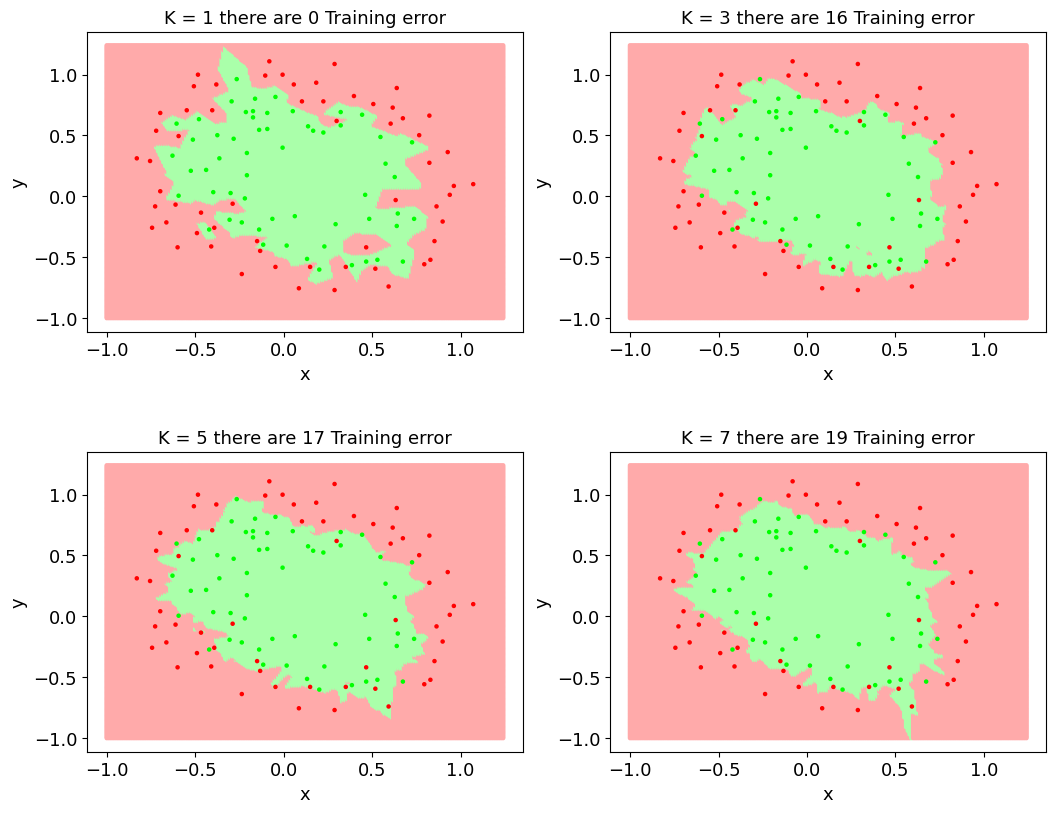

In [9]:
#Figure Plot
plt.figure()
## k=1 decision boundary plot
plt.subplot(2,2,1)
plt.subplots_adjust(left=0.001, right=1.5, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
num_green_error = 0
num_red_error = 0
for i in range(len(X)):
    J=np.array([X[i]]*len(X))
    xxY = zip(J,Y)
    color = mesh_colour(csv,xxY,1)
    plt.scatter(x=J,y=Y,s=5,c=color)
colourrrr=colorrrr(ok_no)
plt.scatter(x=x,y=y,s=5,c=colourrrr)
for csv_row in csv:
    if csv_row[2] == 1:
        if classification(csv,[csv_row[0],csv_row[1]],1) !=1:
            num_green_error +=1
    if csv_row[2] == 0:
        if classification(csv,[csv_row[0],csv_row[1]],1) !=0:
            num_red_error +=1
print("From the k=1 graph there are totally",num_green_error+num_red_error,"training errors.")
print(num_green_error,"green errors and",num_red_error,"red errors.")
print("")
plt.title(f"K = 1 there are {num_green_error+num_red_error} Training error",fontsize = 13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("x",fontsize = 13)
plt.ylabel("y",fontsize = 13)






## k=3 decision boundary plot
plt.subplot(2,2,2)
plt.subplots_adjust(left=0.001, right=1.5, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
num_green_error = 0
num_red_error = 0
for i in range(len(X)):
    J=np.array([X[i]]*len(X))
    xxY = zip(J,Y)
    color = mesh_colour(csv,xxY,3)
    plt.scatter(x=J,y=Y,s=5,c=color)
colourrrr=colorrrr(ok_no)
plt.scatter(x=x,y=y,s=5,c=colourrrr)
for csv_row in csv:
    if csv_row[2] == 1:
        if classification(csv,[csv_row[0],csv_row[1]],3) !=1:
            num_green_error +=1
    if csv_row[2] == 0:
        if classification(csv,[csv_row[0],csv_row[1]],3) !=0:
            num_red_error +=1
print("From the k=3 graph there are totally",num_green_error+num_red_error,"training errors.")
print(num_green_error,"green errors and",num_red_error,"red errors.")
print("")
plt.title(f"K = 3 there are {num_green_error+num_red_error} Training error",fontsize = 13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("x",fontsize = 13)
plt.ylabel("y",fontsize = 13)




## k=5 decision boundary plot
plt.subplot(2,2,3)
plt.subplots_adjust(left=0.001, right=1.5, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
num_green_error = 0
num_red_error = 0
for i in range(len(X)):
    J=np.array([X[i]]*len(X))
    xxY = zip(J,Y)
    color = mesh_colour(csv,xxY,5)
    plt.scatter(x=J,y=Y,s=5,c=color)
colourrrr=colorrrr(ok_no)
plt.scatter(x=x,y=y,s=5,c=colourrrr)
for csv_row in csv:
    if csv_row[2] == 1:
        if classification(csv,[csv_row[0],csv_row[1]],5) !=1:
            num_green_error +=1
    if csv_row[2] == 0:
        if classification(csv,[csv_row[0],csv_row[1]],5) !=0:
            num_red_error +=1
print("From the k=5 graph there are totally",num_green_error+num_red_error,"training errors.")
print(num_green_error,"green errors and",num_red_error,"red errors.")
print("")
plt.title(f"K = 5 there are {num_green_error+num_red_error} Training error",fontsize = 13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("x",fontsize = 13)
plt.ylabel("y",fontsize = 13)







## k=7 decision boundary plot
plt.subplot(2,2,4)
plt.subplots_adjust(left=0.001, right=1.5, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
num_green_error = 0
num_red_error = 0
for i in range(len(X)):
    J=np.array([X[i]]*len(X))
    xxY = zip(J,Y)
    color = mesh_colour(csv,xxY,7)
    plt.scatter(x=J,y=Y,s=5,c=color)
colourrrr=colorrrr(ok_no)
plt.scatter(x=x,y=y,s=5,c=colourrrr)
for csv_row in csv:
    if csv_row[2] == 1:
        if classification(csv,[csv_row[0],csv_row[1]],7) !=1:
            num_green_error +=1
    if csv_row[2] == 0:
        if classification(csv,[csv_row[0],csv_row[1]],7) !=0:
            num_red_error +=1
print("From the k=7 graph there are totally",num_green_error+num_red_error,"training errors.")
print(num_green_error,"green errors and",num_red_error,"red errors.")
print("")
plt.title(f"K = 7 there are {num_green_error+num_red_error} Training error",fontsize = 13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("x",fontsize = 13)
plt.ylabel("y",fontsize = 13)
plt.show()